##Clustering for "time" and "speed_limit"


##Libraries used
The libraries we *will* be using are:


*   Scikit-Learn
*   Pandas
*   Matplotlib
*   Seaborn
*   Numpy
*   Scipy
<br/> One more module called "Kneed" will also be used for determing the "K" value using Elbow Method.





In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Importing the dataset

In [ ]:
#Importing and reading the dataset
data = pd.read_csv("/content/dft-road-casualty-statistics-accident-2019-COMPLETE-PREPROCESS.csv")
data

,time,speed_limit,junction_detail,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,accident_severity,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1750,30,1,1,1,1,1,3,NaN,NaN,NaN,light_conditions,1.0,Daylight
1,150,30,2,2,1,1,1,3,NaN,NaN,NaN,light_conditions,2.0,Darkness - lights lit
2,120,20,2,2,1,1,1,2,NaN,NaN,NaN,light_conditions,3.0,Darkness - lights unlit
3,40,30,4,2,1,1,1,3,NaN,NaN,NaN,light_conditions,4.0,Darkness - no lighting
4,135,30,4,2,1,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50473,2220,30,2,2,1,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN
50474,1450,30,1,1,1,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN
50475,1055,60,2,1,1,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN
50476,1530,60,2,1,1,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN


Now, let's extract the feature columns only. Here, we are not using the term "predictor" for the datapoints because we are not expecting any predictive output, rather the datapoints will be grouped together in the most appropriate cluster(s).

Also, for now, we will only be considering and extracting two columns that will be used for the clustering

In [ ]:
#Extracing the time and speed_limit columns
kmeans_data =  data.iloc[:, [0, 1]]
kmeans_data

,time,speed_limit
0,1750,30
1,150,30
2,120,20
3,40,30
4,135,30
...,...,...
50473,2220,30
50474,1450,30
50475,1055,60
50476,1530,60


Taking the predictor values into an array:

In [ ]:
features_value = kmeans_data.values
features_value

array([[1750,   30],
       [ 150,   30],
       [ 120,   20],
       ...,
       [1055,   60],
       [1530,   60],
       [1410,   30]])

##Choosing the value of "K" for K-Means Clustering

Before applying the K-means algorithm we need to decide how many clusters we want to create. How do we choose this value? 
<br/>In the following cell, we will import KMeans from Scikit-Learn. Then, for each value of K from 1 to 11, we will train the K-means model with the dataset and find out the *scattering* of the clusters for each value of K.

In [ ]:
# import necessary libraries
from sklearn.cluster import KMeans
from scipy.spatial import distance

# create an empty list to store the inertia values for each number of clusters
inertia = []

# define the range of clusters to try
K = range(1,11)

# create an empty list to store the distortion values for each number of clusters
distortions = []

# iterate over the range of clusters
for k in K:
    # create a KMeans clustering model with the current number of clusters
    km = KMeans(n_clusters=k)
    
    # fit the model to the data
    km = km.fit(features_value)
    
    # append the inertia value to the inertia list
    inertia.append(km.inertia_)
    
    # calculate the distortion value and append it to the distortions list
    distortions.append(sum(np.min(distance.cdist(features_value, km.cluster_centers_, 'euclidean'), axis=1)) /
    features_value.shape[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

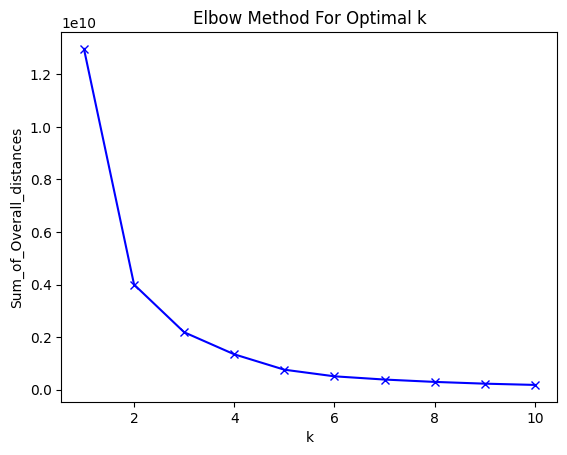

In [ ]:
# plot the inertia values against the number of clusters (K)
plt.plot(K, inertia, 'bx-')

# add x and y axis labels
plt.xlabel('k')
plt.ylabel('Sum_of_Overall_distances')

# add a title to the plot
plt.title('Elbow Method For Optimal k')

# display the plot
plt.show()

From the above plot, we can see that, for increasing values of K, we get lower values of the `Sum of Overall Distances` between centroids and the datapoints in the clusters. However, the rate at which this quantity decreases also decreases with higher values of K. In other words, we see the largest decrease of that quantity between `K=1` and `K=2` and then the second largest drop is between `K=2` and `K=3`. Afterwards, the further decrease in `K` has ever so smaller impact on the `Sum of Overall Distances`. Hence, we identify `K=3` as the **elbow point**.  
We can do this programmaticallyas well but we will need to install the "Kneed" package/module to identify the elbow point "K" value, even though it's quite understandable from the plotting above.

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import necessary libraries
from kneed import KneeLocator

# create a KneeLocator object to identify the "elbow" point in the inertia plot
# the KneeLocator takes as inputs the range of K values (1 to 10), the inertia values, 
# and parameters specifying the shape of the curve and the direction of change
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")

# access the elbow attribute of the KneeLocator object to get the optimal number of clusters
# based on the location of the "elbow" point in the inertia plot
kl.elbow

3

Let's now start clustering the values from the dataset. As we now know, the "K" value is 3, so we will now carry-forward our implementation accordingly.

In [ ]:
# create a KMeans clustering model with 3 clusters
kmeans = KMeans(n_clusters=3)

# fit the KMeans model to the data
kmeans.fit(features_value)

# use the trained model to predict the cluster assignments for each data point
Myclusters = kmeans.predict(features_value)

# print the cluster assignments to the console
Myclusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 0, ..., 0, 2, 2], dtype=int32)

Don't get confused when you see the `kmeans.predict()` function in the above code block. Certanly it's not a supervised learning technique and we don't have any "Label" data to predict from. But the clusters we are deciding will have the associated datapoints in them. To decide which datapoints belong in which cluster, this `kmeans.predict()` function will be used.

In order to hold the corresponding cluster values for each datapoint/feature, we are adding a new column to the Mycluster array.

In [ ]:
kmeans_data['cluster'] = Myclusters
kmeans_data

<ipython-input-105-74feaf381f19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_data['cluster'] = Myclusters


,time,speed_limit,cluster
0,1750,30,1
1,150,30,0
2,120,20,0
3,40,30,0
4,135,30,0
...,...,...,...
50473,2220,30,1
50474,1450,30,2
50475,1055,60,0
50476,1530,60,2


Let's now find the final centroids for the clusters

In [ ]:
# extract the cluster centers from the trained KMeans model
centers = np.array(kmeans.cluster_centers_)

# print the cluster centers to the console
centers

# create a pandas DataFrame to store the cluster centers
centroid = pd.DataFrame(centers)

# print the DataFrame to the console
centroid

,0,1
0,743.363829,33.924491
1,1927.690039,33.177698
2,1405.669758,34.199242


We will now plot the clustered outputs for the features we have used.

<Axes: xlabel='time', ylabel='speed_limit'>

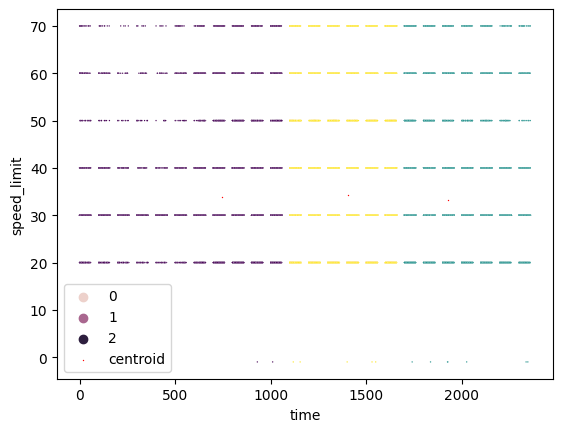

In [ ]:
# create a scatter plot of the data points colored by cluster membership
# the 'x' and 'y' parameters specify the columns to use for the x and y axes, respectively
# the 's' parameter sets the size of the data points, and the 'c' parameter specifies the color by cluster
# the 'marker' parameter sets the shape of the data points, and the 'hue' parameter sets the legend labels
sns.scatterplot(x=kmeans_data['time'], y=kmeans_data['speed_limit'], s=10, c=kmeans_data['cluster'], marker="o", hue=kmeans_data['cluster'])

# create a scatter plot of the cluster centers
# the 'x' and 'y' parameters specify the columns to use for the x and y axes, respectively
# the 'marker' parameter sets the shape of the data points, the 'color' parameter sets the color of the data points
# the 's' parameter sets the size of the data points, and the 'label' parameter sets the legend label
sns.scatterplot(x=centers[:,0], y=centers[:,1], marker="o", color='r', s=10, label="centroid")

##Libraries used
The libraries we *will* be using are:


*   Scikit-Learn
*   Pandas
*   Matplotlib
*   Seaborn
*   Numpy
*   Scipy
<br/> One more module called "Kneed" will also be used for determing the "K" value using Elbow Method.





##Clustering for "time" and "weather_conditions"






In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Importing and reading the dataset
data = pd.read_csv("/content/dft-road-casualty-statistics-accident-2019-COMPLETE-PREPROCESS.csv")
data

,time,speed_limit,junction_detail,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,accident_severity,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1750,30,1,1,1,1,1,3,NaN,NaN,NaN,light_conditions,1.0,Daylight
1,150,30,2,2,1,1,1,3,NaN,NaN,NaN,light_conditions,2.0,Darkness - lights lit
2,120,20,2,2,1,1,1,2,NaN,NaN,NaN,light_conditions,3.0,Darkness - lights unlit
3,40,30,4,2,1,1,1,3,NaN,NaN,NaN,light_conditions,4.0,Darkness - no lighting
4,135,30,4,2,1,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50473,2220,30,2,2,1,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN
50474,1450,30,1,1,1,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN
50475,1055,60,2,1,1,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN
50476,1530,60,2,1,1,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN


Now, let's extract the feature columns only. Here, we are not using the term "predictor" for the datapoints because we are not expecting any predictive output, rather the datapoints will be grouped together in the most appropriate cluster(s).

Also, for now, we will only be considering and extracting two columns that will be used for the clustering

In [ ]:
#Time and weather_conditions columns extracted
kmeans_data =  data.iloc[:, [0, 4]]
kmeans_data

,time,weather_conditions
0,1750,1
1,150,1
2,120,1
3,40,1
4,135,1
...,...,...
50473,2220,1
50474,1450,1
50475,1055,1
50476,1530,1


Taking the predictor values into an array:

In [ ]:
features_value = kmeans_data.values
features_value

array([[1750,    1],
       [ 150,    1],
       [ 120,    1],
       ...,
       [1055,    1],
       [1530,    1],
       [1410,    1]])

##Choosing the value of "K" for K-Means Clustering

Before applying the K-means algorithm we need to decide how many clusters we want to create. How do we choose this value? 
<br/>In the following cell, we will import KMeans from Scikit-Learn. Then, for each value of K from 1 to 11, we will train the K-means model with the dataset and find out the *scattering* of the clusters for each value of K.

In [ ]:
# import necessary libraries
from sklearn.cluster import KMeans
from scipy.spatial import distance

# create an empty list to store the inertia values for each number of clusters
inertia = []

# define the range of clusters to try
K = range(1,11)

# create an empty list to store the distortion values for each number of clusters
distortions = []

# iterate over the range of clusters
for k in K:
    # create a KMeans clustering model with the current number of clusters
    km = KMeans(n_clusters=k)
    
    # fit the model to the data
    km = km.fit(features_value)
    
    # append the inertia value to the inertia list
    inertia.append(km.inertia_)
    
    # calculate the distortion value and append it to the distortions list
    distortions.append(sum(np.min(distance.cdist(features_value, km.cluster_centers_, 'euclidean'), axis=1)) /
    features_value.shape[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

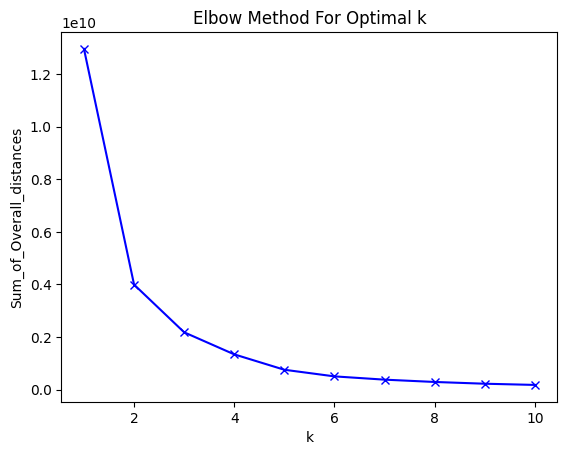

In [ ]:
# plot the inertia values against the number of clusters (K)
plt.plot(K, inertia, 'bx-')

# add x and y axis labels
plt.xlabel('k')
plt.ylabel('Sum_of_Overall_distances')

# add a title to the plot
plt.title('Elbow Method For Optimal k')

# display the plot
plt.show()

From the above plot, we can see that, for increasing values of K, we get lower values of the `Sum of Overall Distances` between centroids and the datapoints in the clusters. However, the rate at which this quantity decreases also decreases with higher values of K. In other words, we see the largest decrease of that quantity between `K=1` and `K=2` and then the second largest drop is between `K=2` and `K=3`. Afterwards, the further decrease in `K` has ever so smaller impact on the `Sum of Overall Distances`. Hence, we identify `K=3` as the **elbow point**.  
We can do this programmaticallyas well but we will need to install the "Kneed" package/module to identify the elbow point "K" value, even though it's quite understandable from the plotting above.

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import necessary libraries
from kneed import KneeLocator

# create a KneeLocator object to identify the "elbow" point in the inertia plot
# the KneeLocator takes as inputs the range of K values (1 to 10), the inertia values, 
# and parameters specifying the shape of the curve and the direction of change
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")

# access the elbow attribute of the KneeLocator object to get the optimal number of clusters
# based on the location of the "elbow" point in the inertia plot
kl.elbow

3

Let's now start clustering the values from the dataset. As we now know, the "K" value is 3, so we will now carry-forward our implementation accordingly.

In [ ]:
# create a KMeans clustering model with 3 clusters
kmeans = KMeans(n_clusters=3)

# fit the KMeans model to the data
kmeans.fit(features_value)

# use the trained model to predict the cluster assignments for each data point
Myclusters = kmeans.predict(features_value)

# print the cluster assignments to the console
Myclusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, ..., 1, 2, 2], dtype=int32)

Don't get confused when you see the `kmeans.predict()` function in the above code block. Certanly it's not a supervised learning technique and we don't have any "Label" data to predict from. But the clusters we are deciding will have the associated datapoints in them. To decide which datapoints belong in which cluster, this `kmeans.predict()` function will be used.

In order to hold the corresponding cluster values for each datapoint/feature, we are adding a new column to the Mycluster array.

In [ ]:
kmeans_data['cluster'] = Myclusters
kmeans_data

<ipython-input-16-74feaf381f19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_data['cluster'] = Myclusters


,time,weather_conditions,cluster
0,1750,1,0
1,150,1,1
2,120,1,1
3,40,1,1
4,135,1,1
...,...,...,...
50473,2220,1,0
50474,1450,1,2
50475,1055,1,1
50476,1530,1,2


In [ ]:
# extract the cluster centers from the trained KMeans model
centers = np.array(kmeans.cluster_centers_)

# print the cluster centers to the console
centers

# create a pandas DataFrame to store the cluster centers
centroid = pd.DataFrame(centers)

# print the DataFrame to the console
centroid

,0,1
0,1927.690039,1.180494
1,743.363829,1.166997
2,1405.669758,1.123623


<Axes: xlabel='time', ylabel='weather_conditions'>

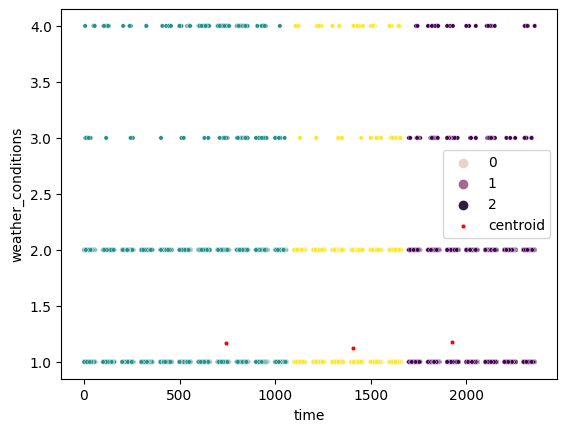

In [ ]:
# create a scatter plot of the data points colored by cluster membership
# the 'x' and 'y' parameters specify the columns to use for the x and y axes, respectively
# the 's' parameter sets the size of the data points, and the 'c' parameter specifies the color by cluster
# the 'marker' parameter sets the shape of the data points, and the 'hue' parameter sets the legend labels
sns.scatterplot(x=kmeans_data['time'], y=kmeans_data['speed_limit'], s=10, c=kmeans_data['cluster'], marker="o", hue=kmeans_data['cluster'])

# create a scatter plot of the cluster centers
# the 'x' and 'y' parameters specify the columns to use for the x and y axes, respectively
# the 'marker' parameter sets the shape of the data points, the 'color' parameter sets the color of the data points
# the 's' parameter sets the size of the data points, and the 'label' parameter sets the legend label
sns.scatterplot(x=centers[:,0], y=centers[:,1], marker="o", color='r', s=10, label="centroid")

##Clustering for "time" and "light_conditions"


In [ ]:
#Importing and reading the dataset
data = pd.read_csv("/content/dft-road-casualty-statistics-accident-2019-COMPLETE-PREPROCESS.csv")
data

,time,speed_limit,junction_detail,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,accident_severity,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1750,30,1,1,1,1,1,3,NaN,NaN,NaN,light_conditions,1.0,Daylight
1,150,30,2,2,1,1,1,3,NaN,NaN,NaN,light_conditions,2.0,Darkness - lights lit
2,120,20,2,2,1,1,1,2,NaN,NaN,NaN,light_conditions,3.0,Darkness - lights unlit
3,40,30,4,2,1,1,1,3,NaN,NaN,NaN,light_conditions,4.0,Darkness - no lighting
4,135,30,4,2,1,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50473,2220,30,2,2,1,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN
50474,1450,30,1,1,1,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN
50475,1055,60,2,1,1,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN
50476,1530,60,2,1,1,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Time and light_conditions columns extracted
kmeans_data =  data.iloc[:, [0, 3]]
kmeans_data

,time,light_conditions
0,1750,1
1,150,2
2,120,2
3,40,2
4,135,2
...,...,...
50473,2220,2
50474,1450,1
50475,1055,1
50476,1530,1


In [ ]:
#Taking the predictor values into an array:
features_value = kmeans_data.values
features_value

array([[1750,    1],
       [ 150,    2],
       [ 120,    2],
       ...,
       [1055,    1],
       [1530,    1],
       [1410,    1]])

##Choosing the value of "K" for K-Means Clustering

Before applying the K-means algorithm we need to decide how many clusters we want to create. How do we choose this value? 
<br/>In the following cell, we will import KMeans from Scikit-Learn. Then, for each value of K from 1 to 11, we will train the K-means model with the dataset and find out the *scattering* of the clusters for each value of K.

In [ ]:
# import necessary libraries
from sklearn.cluster import KMeans
from scipy.spatial import distance

# create an empty list to store the inertia values for each number of clusters
inertia = []

# define the range of clusters to try
K = range(1,11)

# create an empty list to store the distortion values for each number of clusters
distortions = []

# iterate over the range of clusters
for k in K:
    # create a KMeans clustering model with the current number of clusters
    km = KMeans(n_clusters=k)
    
    # fit the model to the data
    km = km.fit(features_value)
    
    # append the inertia value to the inertia list
    inertia.append(km.inertia_)
    
    # calculate the distortion value and append it to the distortions list
    distortions.append(sum(np.min(distance.cdist(features_value, km.cluster_centers_, 'euclidean'), axis=1)) /
    features_value.shape[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

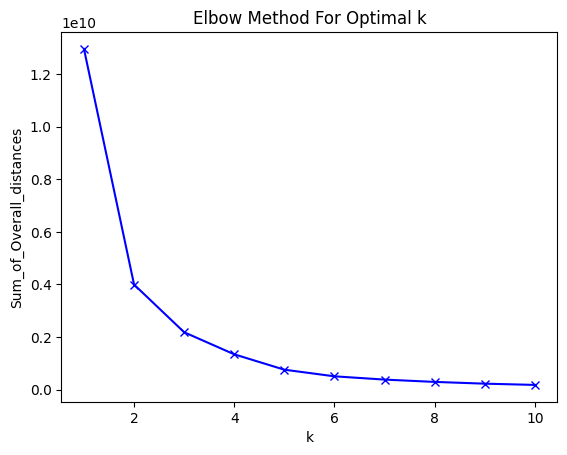

In [ ]:
# plot the inertia values against the number of clusters (K)
plt.plot(K, inertia, 'bx-')

# add x and y axis labels
plt.xlabel('k')
plt.ylabel('Sum_of_Overall_distances')

# add a title to the plot
plt.title('Elbow Method For Optimal k')

# display the plot
plt.show()

In [ ]:
# import necessary libraries
from kneed import KneeLocator

# create a KneeLocator object to identify the "elbow" point in the inertia plot
# the KneeLocator takes as inputs the range of K values (1 to 10), the inertia values, 
# and parameters specifying the shape of the curve and the direction of change
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")

# access the elbow attribute of the KneeLocator object to get the optimal number of clusters
# based on the location of the "elbow" point in the inertia plot
kl.elbow

3

Let's now start clustering the values from the dataset. As we now know, the "K" value is 3, so we will now carry-forward our implementation accordingly.

In [ ]:
# create a KMeans clustering model with 3 clusters
kmeans = KMeans(n_clusters=3)

# fit the KMeans model to the data
kmeans.fit(features_value)

# use the trained model to predict the cluster assignments for each data point
Myclusters = kmeans.predict(features_value)

# print the cluster assignments to the console
Myclusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, ..., 1, 2, 2], dtype=int32)

In order to hold the corresponding cluster values for each datapoint/feature, we are adding a new column to the Mycluster array.

In [ ]:
kmeans_data['cluster'] = Myclusters
kmeans_data

<ipython-input-26-74feaf381f19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_data['cluster'] = Myclusters


,time,light_conditions,cluster
0,1750,1,0
1,150,2,1
2,120,2,1
3,40,2,1
4,135,2,1
...,...,...,...
50473,2220,2,0
50474,1450,1,2
50475,1055,1,1
50476,1530,1,2


Let's now find the final centroids for the clusters

In [ ]:
# extract the cluster centers from the trained KMeans model
centers = np.array(kmeans.cluster_centers_)

# print the cluster centers to the console
centers

# create a pandas DataFrame to store the cluster centers
centroid = pd.DataFrame(centers)

# print the DataFrame to the console
centroid

,0,1
0,1927.690039,1.659054
1,743.363829,1.242788
2,1405.669758,1.067370


We will now plot the clustered outputs for the features we have used.

<Axes: xlabel='time', ylabel='light_conditions'>

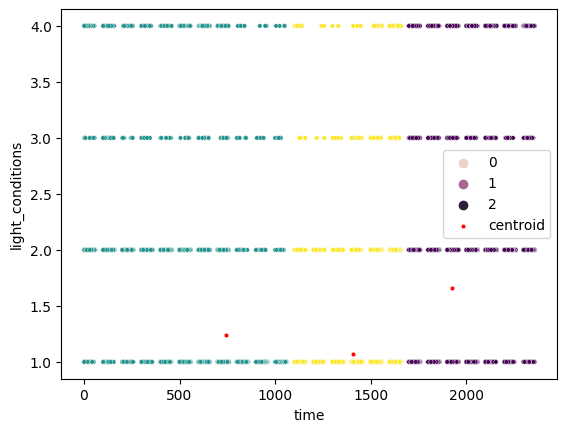

In [ ]:
# create a scatter plot of the data points colored by cluster membership
# the 'x' and 'y' parameters specify the columns to use for the x and y axes, respectively
# the 's' parameter sets the size of the data points, and the 'c' parameter specifies the color by cluster
# the 'marker' parameter sets the shape of the data points, and the 'hue' parameter sets the legend labels
sns.scatterplot(x=kmeans_data['time'], y=kmeans_data['speed_limit'], s=10, c=kmeans_data['cluster'], marker="o", hue=kmeans_data['cluster'])

# create a scatter plot of the cluster centers
# the 'x' and 'y' parameters specify the columns to use for the x and y axes, respectively
# the 'marker' parameter sets the shape of the data points, the 'color' parameter sets the color of the data points
# the 's' parameter sets the size of the data points, and the 'label' parameter sets the legend label
sns.scatterplot(x=centers[:,0], y=centers[:,1], marker="o", color='r', s=10, label="centroid")